## Courant Number
### Let numerical scheme fits Anlaytic/Physical scheme

courant number $\sigma$

$$\sigma = u \frac {\Delta t} {\Delta x} \leq \sigma_{max}$$
where u is speed of wave.  

$\sigma_{max}$ ensures stability

courant number lets numerical shceme fits analyticsal/physical scheme.
We got better result when nx increased

In [5]:
import numpy
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

In [8]:
def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1

    u = numpy.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

    un = numpy.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
        if not n%5:
            plt.plot(np.linspace(0,2,nx), u)

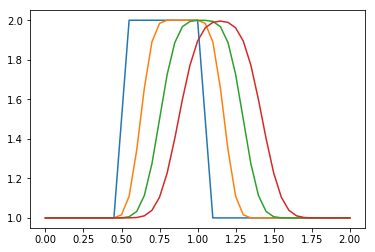

In [9]:
linearconv(41)

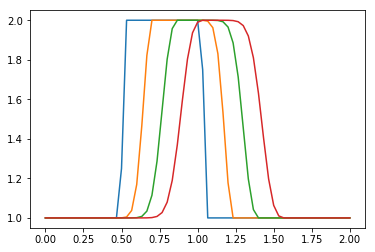

In [10]:
linearconv(61)

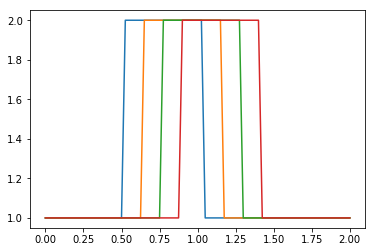

In [11]:
linearconv(81)

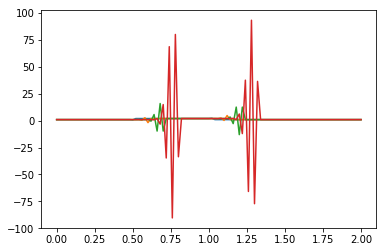

In [12]:
linearconv(101)

When nx = 101, it no more looks like an original hat function.
This is because over $\Delta t$ time, we are evaluating the wave at $x$ which is not calculated with our $\Delta x$

We evaluate $u$ at some points of $x$ that is chosen with the size of $\Delta x$.  
When $\Delta t$ is too big, we need the value of x that goes over the range of x we need

In [13]:
from IPython.display import Image
Image(url='http://www.thevisualroom.com/_images/domain_of_dependence.png')

- For upwinding (backward differencing in space) the domain of dependence at n is from i-1 to i. This is suitable for a positive wave speed c

- For forward differencing the domain of dependence at n is from i to i+1. This is suitable for a negative wave speed c

- The solution at the next timestep must be able to include all the physical information that influences the solution from the previous timestep

- The CFL condition σ<1 ensures that the domain of dependence of the governing equation is entirely contained in the domain of dependence of the numerical scheme

- Also demonstrates why backward differencing is unstable for a negative wave speed, i.e. if the wave move from right to left, the solution should depend on points i and i+1 not i and i-1

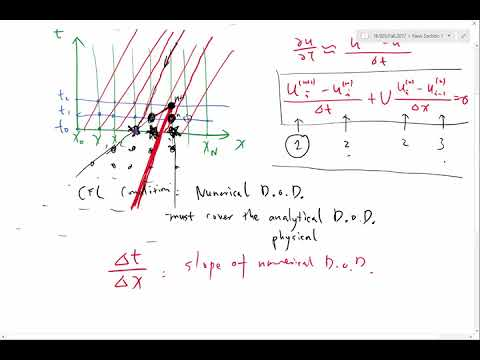

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('TwhclFEV6BM')